## Exercise on Machine Learning 101 - Part 2
---
Instructions are given in <span style="color:blue">blue</span> color.

In this exercise, you will work with decision trees to (hopefully) further improve the classification results we got during the CRISP-DM lecture notes.

* <div style="color:blue">This week's material included an article by Pedro Domingos in which he gave a brief insight into the domain of Machine Learning. One of the papers' sections mentioned the usage of so-called <b>model ensembles</b>. Go back to the article, find the three techniques used for ensemble methods, as stated by Domingos, and cite his description for each one here.</div>

*Your solution goes here:*


Remember that email you send to your social worker friend? The one where you told him that you possibly need more data to get improved results out of your model? Well, he replied and stated that, unfortunately, there isn't any more data he could provide to you.
It seems there is nothing left you can do but to go back to the drawing board for the second iteration of your modeling phase.

* <div style="color:blue">The folder <code>/data</code>, next to this exercise, contains the file <code>Student_Survey.csv</code>. Read the data into a <code>DataFrame</code> and make sure to import any necessary libraries, too.</div>

In [66]:
# Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score

The following is needed for **reproducibility** (see [here](https://www.mikulskibartosz.name/how-to-set-the-global-random_state-in-scikit-learn/)):

In [67]:
np.random.seed(42)

In [68]:
# Your solution goes here:
survey = pd.read_csv('./data/Student_Survey.csv')
samples = survey.shape[0]
print("The following are the number of samples in the DataFrame: " + str(samples))
survey

The following are the number of samples in the DataFrame: 395


,sex,age,address,famsize,Pstatus,Mjob,Fjob,studytime,failures,activities,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,at_home,teacher,2,0,no,...,4,3,4,1,1,3,6,5,6,6
1,F,17,U,GT3,T,at_home,other,2,0,no,...,5,3,3,1,1,3,4,5,5,6
2,F,15,U,LE3,T,at_home,other,2,3,no,...,4,3,2,2,3,3,10,7,8,10
3,F,15,U,GT3,T,health,services,3,0,yes,...,3,2,2,1,1,5,2,15,14,15
4,F,16,U,GT3,T,other,other,2,0,no,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,U,LE3,A,services,services,2,2,no,...,5,5,4,4,5,4,11,9,9,9
391,M,17,U,LE3,T,services,services,1,0,no,...,2,4,5,3,4,2,3,14,16,16
392,M,21,R,GT3,T,other,other,1,3,no,...,5,5,3,3,3,3,3,10,8,7
393,M,18,R,LE3,T,services,other,1,0,no,...,4,4,1,3,4,5,0,11,12,10


* <div style="color:blue">Remove the columns <code>G1</code>, <code>G2</code>, <code>G3</code>, and <code>Walc</code> from your <code>DataFrame</code>.</div>

In [69]:
# Your solution goes here:
survey.drop(['G1', 'G2', 'G3', 'Walc'], axis=1, inplace=True)
survey

,sex,age,address,famsize,Pstatus,Mjob,Fjob,studytime,failures,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,health,absences
0,F,18,U,GT3,A,at_home,teacher,2,0,no,yes,yes,no,no,4,3,4,1,3,6
1,F,17,U,GT3,T,at_home,other,2,0,no,no,yes,yes,no,5,3,3,1,3,4
2,F,15,U,LE3,T,at_home,other,2,3,no,yes,yes,yes,no,4,3,2,2,3,10
3,F,15,U,GT3,T,health,services,3,0,yes,yes,yes,yes,yes,3,2,2,1,5,2
4,F,16,U,GT3,T,other,other,2,0,no,yes,yes,no,no,4,3,2,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,U,LE3,A,services,services,2,2,no,yes,yes,no,no,5,5,4,4,4,11
391,M,17,U,LE3,T,services,services,1,0,no,no,yes,yes,no,2,4,5,3,2,3
392,M,21,R,GT3,T,other,other,1,3,no,no,yes,no,no,5,5,3,3,3,3
393,M,18,R,LE3,T,services,other,1,0,no,no,yes,yes,no,4,4,1,3,5,0


* <div style="color:blue">Replace all categorical values in your <code>DataFrame</code> with numerical data - using an appropriate method.</div>

In [70]:
# Your solution goes here:

label_encoder = LabelEncoder()
categories = ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for s in categories:
    survey[s] = label_encoder.fit_transform(survey[s])
survey

,sex,age,address,famsize,Pstatus,Mjob,Fjob,studytime,failures,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,health,absences
0,0,18,1,0,0,0,4,2,0,0,1,1,0,0,4,3,4,1,3,6
1,0,17,1,0,1,0,2,2,0,0,0,1,1,0,5,3,3,1,3,4
2,0,15,1,1,1,0,2,2,3,0,1,1,1,0,4,3,2,2,3,10
3,0,15,1,0,1,1,3,3,0,1,1,1,1,1,3,2,2,1,5,2
4,0,16,1,0,1,2,2,2,0,0,1,1,0,0,4,3,2,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,1,0,3,3,2,2,0,1,1,0,0,5,5,4,4,4,11
391,1,17,1,1,1,3,3,1,0,0,0,1,1,0,2,4,5,3,2,3
392,1,21,0,0,1,2,2,1,3,0,0,1,0,0,5,5,3,3,3,3
393,1,18,0,1,1,3,2,1,0,0,0,1,1,0,4,4,1,3,5,0


One of the main issues present in our data is that the classes are highly **imbalanced**. This effect can be seen rather often when performing classification tasks and means that there is a different number of total samples for each present class. Usually, imbalanced classes make it much harder to successfully fit a model. In our case, this imbalance is quite drastic.
* <div style="color:blue">Confirm, both visually and numerically, that the classes in your <code>DataFrame</code> are imbalanced.</div>

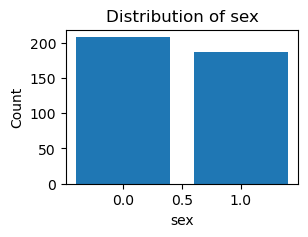

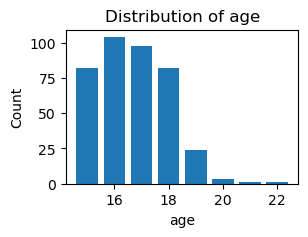

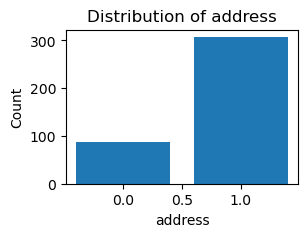

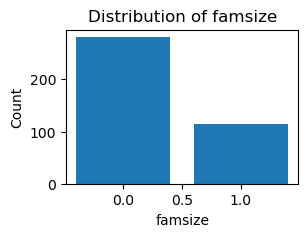

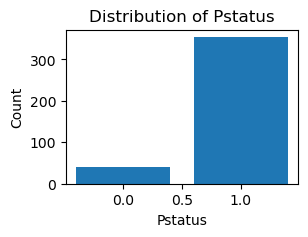

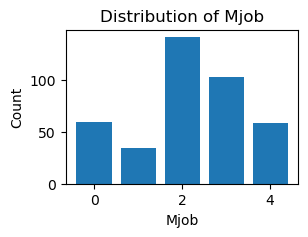

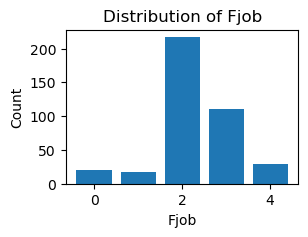

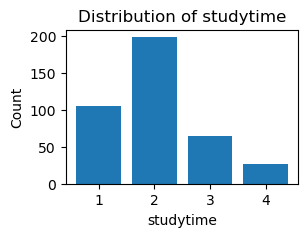

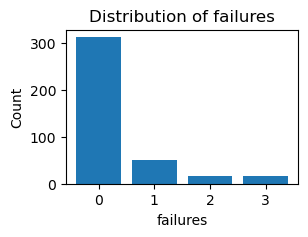

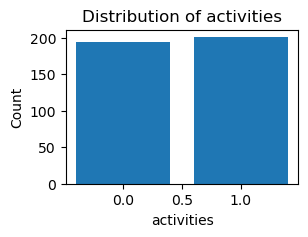

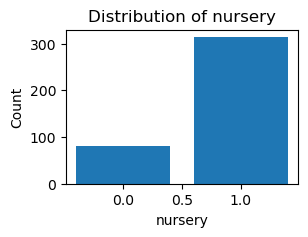

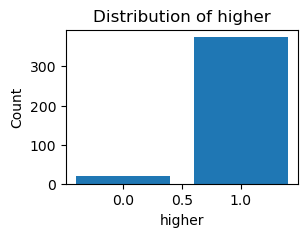

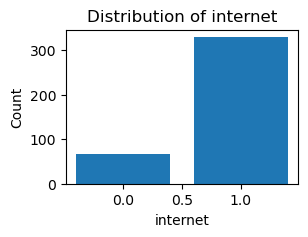

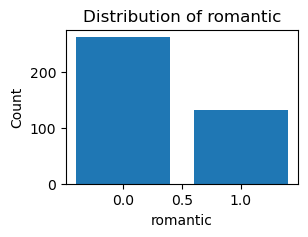

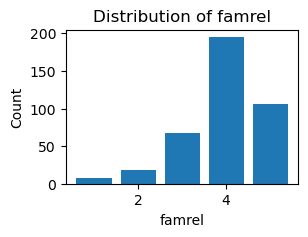

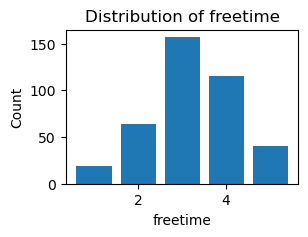

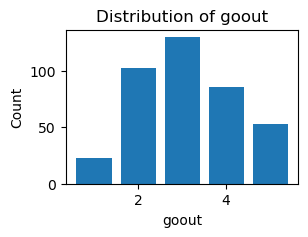

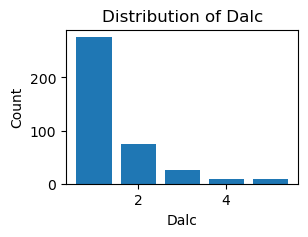

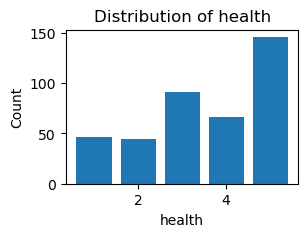

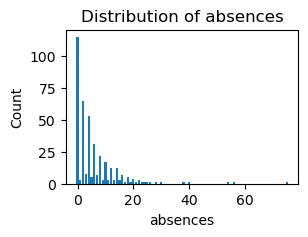

Column: sex
sex
0    208
1    187
Name: count, dtype: int64

Column: age
age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64

Column: address
address
1    307
0     88
Name: count, dtype: int64

Column: famsize
famsize
0    281
1    114
Name: count, dtype: int64

Column: Pstatus
Pstatus
1    354
0     41
Name: count, dtype: int64

Column: Mjob
Mjob
2    141
3    103
0     59
4     58
1     34
Name: count, dtype: int64

Column: Fjob
Fjob
2    217
3    111
4     29
0     20
1     18
Name: count, dtype: int64

Column: studytime
studytime
2    198
1    105
3     65
4     27
Name: count, dtype: int64

Column: failures
failures
0    312
1     50
2     17
3     16
Name: count, dtype: int64

Column: activities
activities
1    201
0    194
Name: count, dtype: int64

Column: nursery
nursery
1    314
0     81
Name: count, dtype: int64

Column: higher
higher
1    375
0     20
Name: count, dtype: int64

Column: internet
internet
1    329
0  

In [71]:
# Your solution goes here:
for column in survey.columns:
    class_counts = survey[column].value_counts()
    plt.figure(figsize=(3, 2))
    plt.bar(class_counts.index, class_counts.values)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')
    plt.show()

for column in survey.columns:
    class_counts = survey[column].value_counts()
    print(f"Column: {column}")
    print(class_counts)
    print()

As usual, depending on the data, the use-case, and your personal experience, there are many techniques you could try to implement in order to circumvent or mitigate imbalanced classes. [This website](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/), for example, lists a number of reasonable suggestions to tackle this issue.

One approach that could potentially work for our data is to reduce the number of total classes. We know (from our **Business Understanding**) that underage students' alcohol consumption classified higher than `1` is already alarmingly high. Therefore, it would make sense to bundle classes `2`, `3`, `4`, and `5` into a single category `0` (representing increased alcohol consumption), while class `1` (low consumption) remains unchanged.

* <div style="color:blue">Replace all entries in the <code>Dalc</code> column that are larger than <b>1</b> with the new <code>0</code> class.</div>

In [72]:
# Your solution goes here:
survey.loc[survey['Dalc'] > 1, 'Dalc'] = 0
survey

,sex,age,address,famsize,Pstatus,Mjob,Fjob,studytime,failures,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,health,absences
0,0,18,1,0,0,0,4,2,0,0,1,1,0,0,4,3,4,1,3,6
1,0,17,1,0,1,0,2,2,0,0,0,1,1,0,5,3,3,1,3,4
2,0,15,1,1,1,0,2,2,3,0,1,1,1,0,4,3,2,0,3,10
3,0,15,1,0,1,1,3,3,0,1,1,1,1,1,3,2,2,1,5,2
4,0,16,1,0,1,2,2,2,0,0,1,1,0,0,4,3,2,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,1,0,3,3,2,2,0,1,1,0,0,5,5,4,0,4,11
391,1,17,1,1,1,3,3,1,0,0,0,1,1,0,2,4,5,0,2,3
392,1,21,0,0,1,2,2,1,3,0,0,1,0,0,5,5,3,0,3,3
393,1,18,0,1,1,3,2,1,0,0,0,1,1,0,4,4,1,0,5,0


* <div style="color:blue">Similar as before, give insight into the new balance of classes, both visually and numerically.</div>

**Note**: Your classes will still not be perfectly balanced, but at least we improved upon the previous situation.

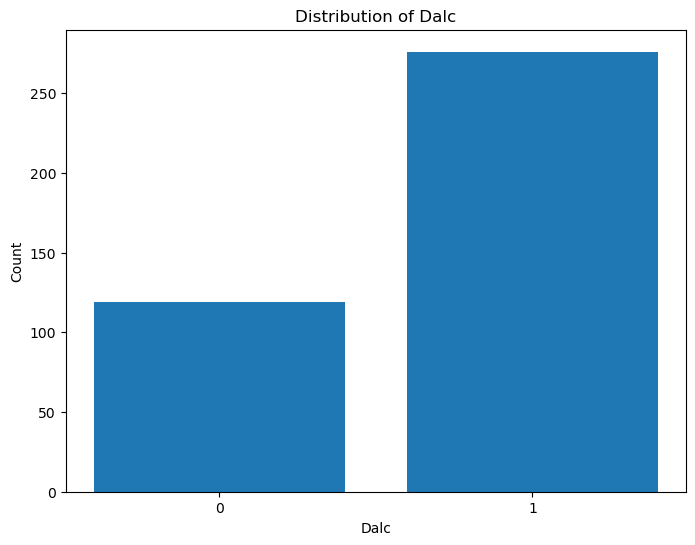

Column: Dalc
Dalc
1    276
0    119
Name: count, dtype: int64



In [73]:
# Your solution goes here:
class_counts = survey['Dalc'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Dalc')
plt.ylabel('Count')
plt.title('Distribution of Dalc')
plt.xticks([0, 1])
plt.show()

class_counts = survey['Dalc'].value_counts()
print(f"Column: Dalc")
print(class_counts)
print()

* <div style="color:blue">For model training, implement a <code>DecisionTreeClassifier</code> for which parameters have been tuned using cross-validated grid search.</div>
* <div style="color:blue">The parameters we are interested in are:</div>

    * `max_depth` - using the values: [3, 4]
    * `min_samples_split` - using the values: [2, 3, 4, 5]
    * `min_samples_leaf` - using the values: [2, 3, 4, 5]

* <div style="color:blue">Explicitly set the <code>criterion</code> parameter of your classifier to <code>entropy</code>.</div>
* <div style="color:blue">Don't forget to eventually <b>fit</b> your model, using optimized parameters.</div>

**Note**: This time around, we are not asking to create a separate test set to perform hold-out-validation. As our data is very sparse, and validation is already performed using cross-validation, this should be the right call.

In [74]:
# Your solution goes here:
X = survey.drop(columns=['Dalc'])
y = survey['Dalc']

param_grid = {
    'max_depth': [3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5]
}
dt_classifier = DecisionTreeClassifier(criterion='entropy')
grid_search = GridSearchCV(dt_classifier, param_grid, scoring='accuracy')
grid_search.fit(X, y)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_dt_classifier = DecisionTreeClassifier(criterion='entropy', **best_params)
best_dt_classifier.fit(X, y)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 3}


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=4,
                       min_samples_split=3)

* <div style="color:blue">Have a look at the documentation for <code>GridSearchCV</code>. What parameter influences the number of folds used for cross-validation? How many folds are there by default?</div>

*Your solution goes here:*
The cv parameter sets the number of folds. There are 5 folds by default

* <div style="color:blue">Print out the parameters for <code>max_depth</code>, <code>min_samples_split</code>, and <code>min_samples_leaf</code> for the best estimator found during grid search.</div>

In [75]:
# Your solution goes here:
print("max_depth:", grid_search.best_params_['max_depth'])
print("min_samples_split:", grid_search.best_params_['min_samples_split'])
print("min_samples_leaf:", grid_search.best_params_['min_samples_leaf'])

max_depth: 3
min_samples_split: 3
min_samples_leaf: 4


* <div style="color:blue">Get the accuracy score of your decision tree.</div>

**Note**: If you have done everything correctly, your accuracy should exceed 70% at this point.

In [76]:
# Your solution goes here:
scores = cross_val_score(best_dt_classifier, X, y, cv=5, scoring='accuracy')
mean_accuracy = scores.mean()
print("Mean Accuracy Score:", mean_accuracy)

Mean Accuracy Score: 0.7113924050632912


* <div style="color:blue">Visualize your decision tree.</div>

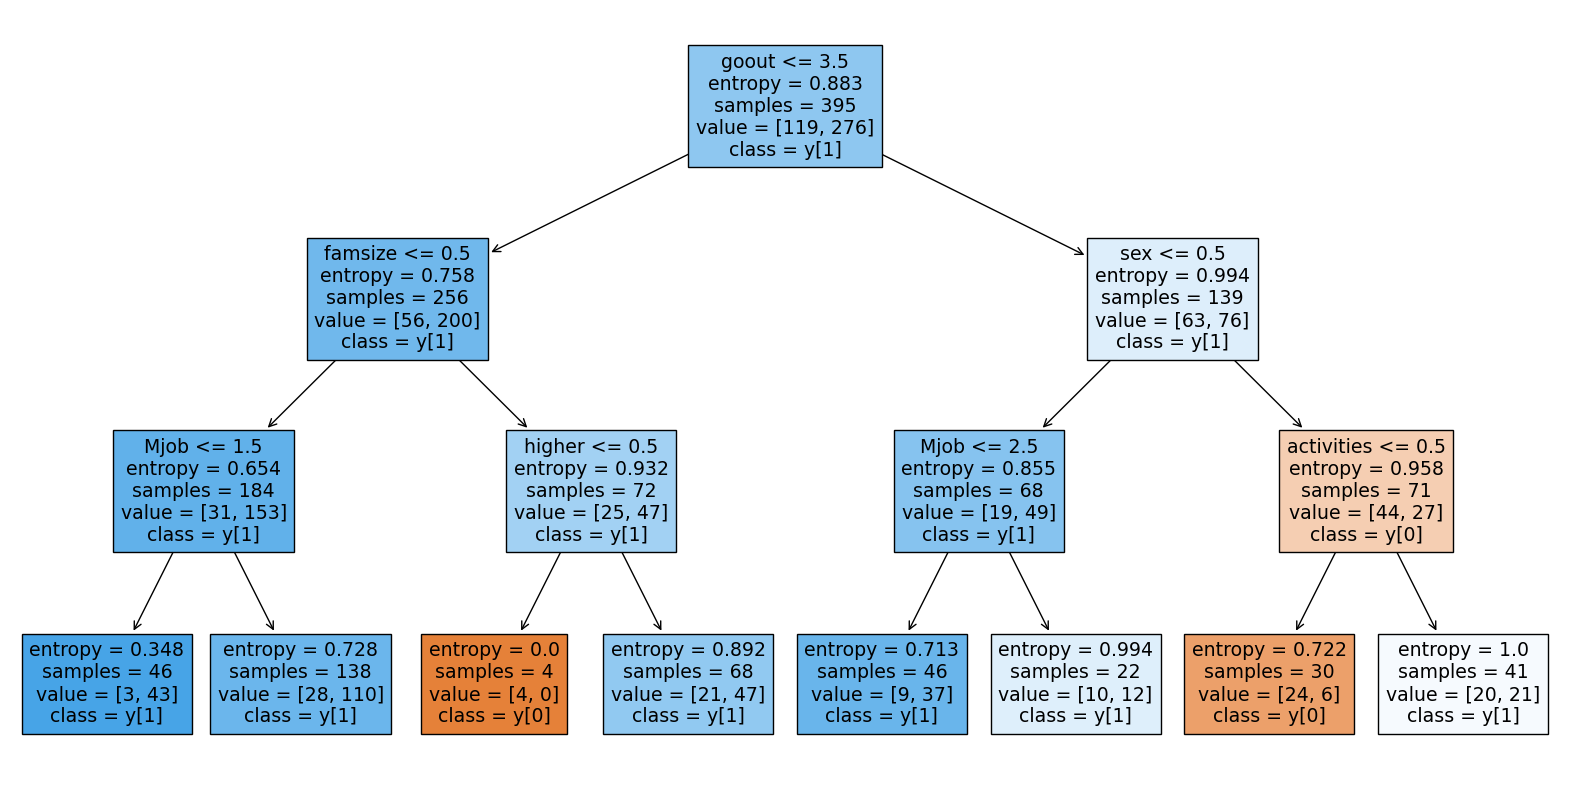

In [84]:
# Your solution goes here:
plt.figure(figsize=(20, 10))  # Set the figure size
plot_tree(best_dt_classifier, filled=True, feature_names=X.columns, class_names=True)
plt.show()

At the beginning of this exercise, you were asked to have a look into model ensembles. Frankly, [ensemble learning](https://en.wikipedia.org/wiki/Ensemble_learning) is a vast topic on its own, for which we, unfortunately, don't have enough time to look into during class. Instead, this exercise is designed to at least make you aware of the concept.

In simple words, ensemble learning is the method of training many base learners (ensemble members) from which the predictions are combined into a single estimator. As a result, this single estimator should have better performance than any of the ensemble members (on average).

When it comes to decision trees, there are several ensemble methods you could choose from - the most fundamental one being the **Random Forrest** estimator. The documentation for `scikit-learn`'s `RandomForestClassifier` can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier).

* <div style="color:blue">Import the <code>ensemble</code> package from <code>sklearn</code>.</div>
* <div style="color:blue">Create a new instance of the <code>RandomForestClassifier</code></div>
* <div style="color:blue">Explicitly set the <code>criterion</code> parameter of your classifier to <code>entropy</code>.</div>
* <div style="color:blue">Explicitly set the <code>n_estimators</code> parameter of your classifier to <code>200</code> (the number of trees in the forest).</div>
* <div style="color:blue">For <code>max_depth</code>, <code>min_samples_split</code>, and <code>min_samples_leaf</code>, use the optimized parameters you found earlier.</div>
* <div style="color:blue">Train your model.</div>

In [85]:
# Your solution goes here:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(criterion='entropy',
                                       n_estimators=200,
                                       max_depth=best_params['max_depth'],
                                       min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'])
rf_classifier.fit(X, y)

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=4,
                       min_samples_split=3, n_estimators=200)

* <div style="color:blue">Get the accuracy score of your random forest.</div>

**Note**: If you have done everything correctly, your accuracy should (slightly) exceed the accuracy of the previous decision tree model.

In [86]:
# Your solution goes here:
y_pred_rf = rf_classifier.predict(X)
accuracy_rf = accuracy_score(y, y_pred_rf)
print("Accuracy Score of Random Forest:", accuracy_rf)

Accuracy Score of Random Forest: 0.739240506329114
